<h1>Linear regression: Training and Validation Data</h1> 

In [1]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

First, we'll create some artificial data in a dataset class. The class will include the option to produce training data or validation data. The training data will include outliers.

In [3]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Create two objects: one that contains training data and a second that contains validation data. Assume that the training data has the outliers. 

In [4]:
# Create training dataset and validation dataset
train_data = Data()
val_data = Data(train = False)

Overlay the training points in red over the function that generated the data. Notice the outliers at x=-3 and around x=2:

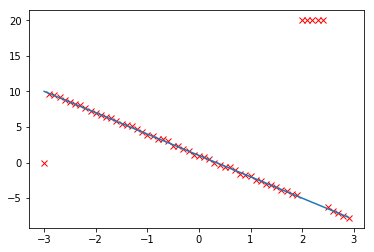

In [5]:
# Plot out training points
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr')
plt.plot(train_data.x.numpy(), train_data.f.numpy())
plt.show()

<h2 id="LR_Loader_Cost">Create a Linear Regression Object,  Data Loader, and Criterion Function</h2>

In [6]:
# Create Linear Regression Class
class linear_regression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Create the criterion function and a <code>DataLoader</code> object: 

In [7]:
# Create MSELoss function and DataLoader
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

## Different `lr` and Data Structures to Store results for different Hyperparameters

Create a list with different learning rates and a tensor (can be a list) for the training and validating cost/total loss. Include the list MODELS, which stores the training model for every value of the learning rate. 

In [8]:
# Create Learning Rate list, the error lists and the MODELS list
learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

<h2 id="Model">Train different models  for different Hyperparameters</h2>

Try different values of learning rates, perform stochastic gradient descent, and save the results on the training data and validation data. Finally, save each model in a list.

In [9]:
# Define the train model function and train the model
def train_model_with_lr (iter, lr_list):
    
    # iterate through different learning rates 
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
    
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

<h2 id="Result">View the Results</h2>

Plot the training loss and validation loss for each learning rate:  

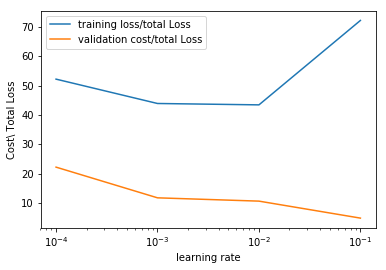

In [10]:
# Plot the training loss and validation loss
plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

Produce a prediction by using the validation data for each model:  

('i', array([[1.4896338],
       [1.4591177],
       [1.4286013]], dtype=float32))
('i', array([[5.6704884],
       [5.5554953],
       [5.4405017]], dtype=float32))
('i', array([[6.618478 ],
       [6.483588 ],
       [6.3486986]], dtype=float32))
('i', array([[14.12662 ],
       [13.703166],
       [13.279711]], dtype=float32))


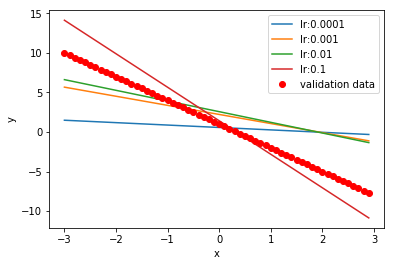

In [11]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h3>Practice</h3>

The object <code>good_model</code> is the best performing model. Use the train loader to get the data samples x and y. Produce an estimate for <code>yhat</code> and print it out for every sample in a for a loop. Compare it to the actual prediction <code>y</code>.

In [22]:
# Practice: Use the train loader to get the data samples x and y. Produce yhat. Compare y and yhat.

good_model = MODELS[2]

for x, y in trainloader:
    print("yhat: "),
    print(good_model(x)),
    print("y:"),
    print(y)
    #print('')

yhat:  tensor([[6.6185]], grad_fn=<ThAddmmBackward>) y: tensor([[0.]])
yhat:  tensor([[6.4836]], grad_fn=<ThAddmmBackward>) y: tensor([[9.6932]])
yhat:  tensor([[6.3487]], grad_fn=<ThAddmmBackward>) y: tensor([[9.4614]])
yhat:  tensor([[6.2138]], grad_fn=<ThAddmmBackward>) y: tensor([[9.2376]])
yhat:  tensor([[6.0789]], grad_fn=<ThAddmmBackward>) y: tensor([[8.7760]])
yhat:  tensor([[5.9440]], grad_fn=<ThAddmmBackward>) y: tensor([[8.5788]])
yhat:  tensor([[5.8091]], grad_fn=<ThAddmmBackward>) y: tensor([[8.1799]])
yhat:  tensor([[5.6743]], grad_fn=<ThAddmmBackward>) y: tensor([[8.0708]])
yhat:  tensor([[5.5394]], grad_fn=<ThAddmmBackward>) y: tensor([[7.6159]])
yhat:  tensor([[5.4045]], grad_fn=<ThAddmmBackward>) y: tensor([[7.1832]])
yhat:  tensor([[5.2696]], grad_fn=<ThAddmmBackward>) y: tensor([[6.9765]])
yhat:  tensor([[5.1347]], grad_fn=<ThAddmmBackward>) y: tensor([[6.7289]])
yhat:  tensor([[4.9998]], grad_fn=<ThAddmmBackward>) y: tensor([[6.3683]])
yhat:  tensor([[4.8649]], gra

<!--Empty Space for separating topics-->

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.